## Stock Price Prediction

In [59]:
#Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Importing dataset

data = pd.read_csv("Flex_stock.csv")
df = pd.DataFrame(data)
df

,Date,Close,Open,High,Low,Volumn,Chg
0,11/9/2023,25.65,25.89,26.06,25.63,2.88M,-0.70%
1,11/8/2023,25.83,25.74,26.00,25.49,2.31M,0.51%
2,11/7/2023,25.70,25.89,26.06,25.70,1.57M,-0.96%
3,11/6/2023,25.95,26.13,26.16,25.85,2.17M,-0.69%
4,11/3/2023,26.13,25.74,26.25,25.64,4.47M,3.04%
...,...,...,...,...,...,...,...
1470,1/8/2018,18.60,18.49,18.65,18.30,2.27M,0.32%
1471,1/5/2018,18.54,18.57,18.67,18.43,2.79M,0.11%
1472,1/4/2018,18.52,18.42,18.76,18.39,7.93M,0.60%
1473,1/3/2018,18.41,18.23,18.47,18.19,2.15M,0.99%


In [61]:
df.head()

,Date,Close,Open,High,Low,Volumn,Chg
0,11/9/2023,25.65,25.89,26.06,25.63,2.88M,-0.70%
1,11/8/2023,25.83,25.74,26.00,25.49,2.31M,0.51%
2,11/7/2023,25.70,25.89,26.06,25.70,1.57M,-0.96%
3,11/6/2023,25.95,26.13,26.16,25.85,2.17M,-0.69%
4,11/3/2023,26.13,25.74,26.25,25.64,4.47M,3.04%


### Data Information

In [62]:
df.describe()

,Close,Open,High,Low
count,1475.000000,1475.000000,1475.000000,1475.000000
mean,15.860692,15.860481,16.110868,15.626834
std,5.121073,5.120159,5.162131,5.081917
min,5.880000,5.980000,6.150000,5.360000
25%,11.180000,11.160000,11.355000,11.010000
50%,16.530000,16.480000,16.780000,16.270000
75%,18.475000,18.500000,18.765000,18.240000
max,28.790000,28.860000,28.900000,28.400000


In [63]:
# showing column wise %ge of NaN values they contains 

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)
  
df


Date 	-	 0.0
Close 	-	 0.0
Open 	-	 0.0
High 	-	 0.0
Low 	-	 0.0
Volumn 	-	 0.0
Chg 	-	 0.0


,Date,Close,Open,High,Low,Volumn,Chg
0,11/9/2023,25.65,25.89,26.06,25.63,2.88M,-0.70%
1,11/8/2023,25.83,25.74,26.00,25.49,2.31M,0.51%
2,11/7/2023,25.70,25.89,26.06,25.70,1.57M,-0.96%
3,11/6/2023,25.95,26.13,26.16,25.85,2.17M,-0.69%
4,11/3/2023,26.13,25.74,26.25,25.64,4.47M,3.04%
...,...,...,...,...,...,...,...
1470,1/8/2018,18.60,18.49,18.65,18.30,2.27M,0.32%
1471,1/5/2018,18.54,18.57,18.67,18.43,2.79M,0.11%
1472,1/4/2018,18.52,18.42,18.76,18.39,7.93M,0.60%
1473,1/3/2018,18.41,18.23,18.47,18.19,2.15M,0.99%


> Since there is no null valus, we can move further 

In [64]:
def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [65]:
top_corelated_values = get_corelated_col(df['Close'], 0.60)
top_corelated_values

,corr value
0,25.65
1,25.83
2,25.70
3,25.95
4,26.13
...,...
1470,18.60
1471,18.54
1472,18.52
1473,18.41


> Looks like all colums except _volume_ are ***highly co-related***. Using them for predictions.

In [66]:
features=["Open","Close","High","Low"]
#df = df[top_corelated_values.index]
df = df[features]
df.head()

,Open,Close,High,Low
0,25.89,25.65,26.06,25.63
1,25.74,25.83,26.00,25.49
2,25.89,25.70,26.06,25.70
3,26.13,25.95,26.16,25.85
4,25.74,26.13,26.25,25.64


In [67]:
df.shape

(1475, 4)

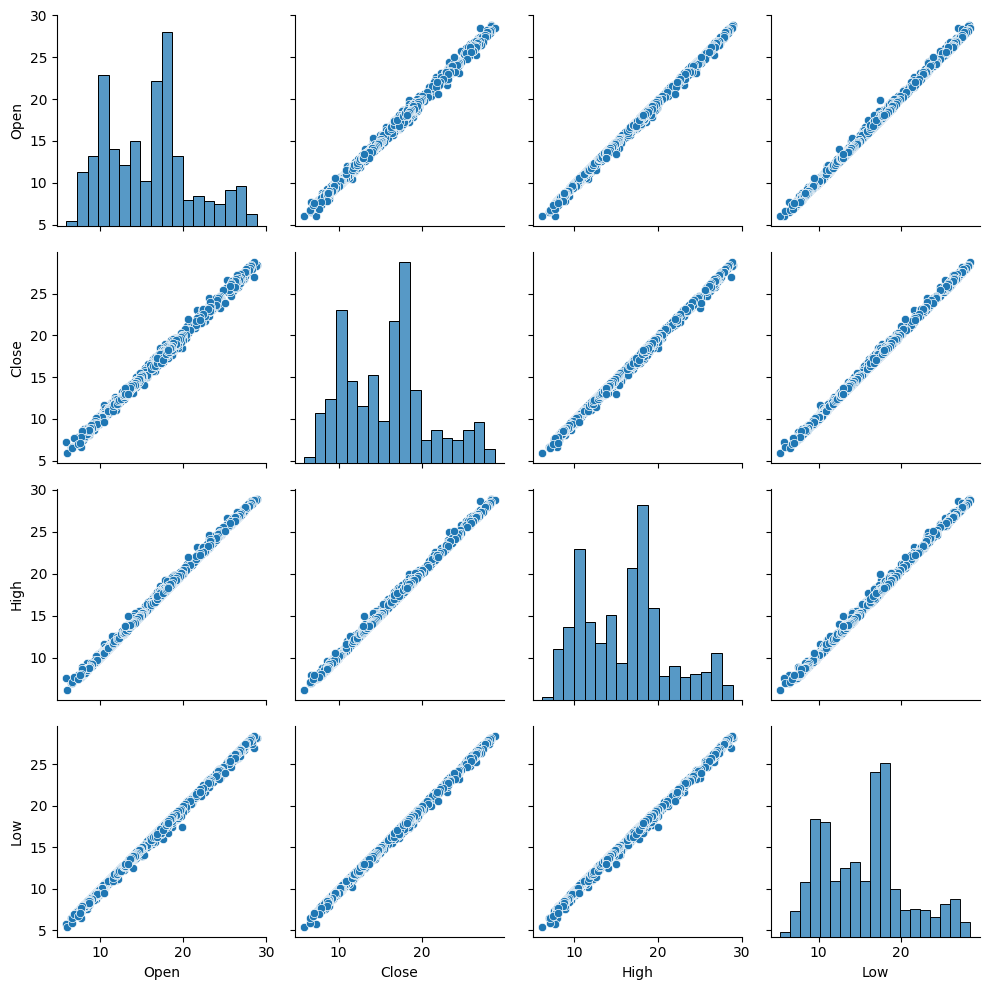

In [68]:
sns.pairplot(df)
plt.tight_layout()

> Since other parameters have linear relationship with __close__, we are using some linear models fore prediction

In [69]:
X = df.drop(['Close'], axis=1)
y = df['Close']

> Since range of data in different columns veries significantly we need to scale the independent variable i.e. X. For this we will use Min-Max Scaling.

In [1]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

NameError: name 'pd' is not defined

## Prediction Model

In [71]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

### 1. Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [73]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
1180,10.27,10.317072
1181,10.30,10.360763
1182,10.42,10.354332
1183,10.42,10.482766
1184,10.54,10.529281


In [74]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9987186652171515


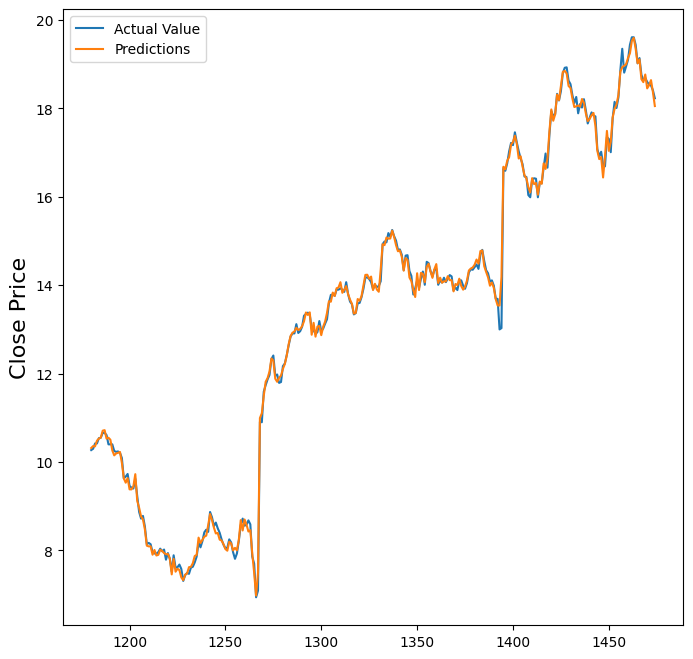

In [75]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

### 2. ANN

In [76]:
# Model Creation

from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):
    
    model = Sequential()
    
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [77]:
# Model Training

model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=70, validation_split=0.2)

Epoch 1/70
30/30 [==============================] - 1s 18ms/step - loss: 344.1889 - val_loss: 119.0358
Epoch 2/70
30/30 [==============================] - 0s 3ms/step - loss: 342.6124 - val_loss: 117.8845
Epoch 3/70
30/30 [==============================] - 0s 2ms/step - loss: 339.0117 - val_loss: 115.1957
Epoch 4/70
30/30 [==============================] - 0s 2ms/step - loss: 328.8968 - val_loss: 108.5217
Epoch 5/70
30/30 [==============================] - 0s 2ms/step - loss: 304.0029 - val_loss: 94.1982
Epoch 6/70
30/30 [==============================] - 0s 2ms/step - loss: 254.2705 - val_loss: 69.4761
Epoch 7/70
30/30 [==============================] - 0s 2ms/step - loss: 176.0987 - val_loss: 36.8488
Epoch 8/70
30/30 [==============================] - 0s 2ms/step - loss: 85.1509 - val_loss: 9.3666
Epoch 9/70
30/30 [==============================] - 0s 2ms/step - loss: 21.3258 - val_loss: 0.1383
Epoch 10/70
30/30 [==============================] - 0s 2ms/step - loss: 1.9173 - val_loss

In [78]:
# Prediction

y_pred_2 = model_2.predict(X_test)

10/10 [==============================] - 0s 1ms/step


In [79]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
1180,10.27,10.420295
1181,10.30,10.521892
1182,10.42,10.542337
1183,10.42,10.662979
1184,10.54,10.617751


In [80]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9969601190395166


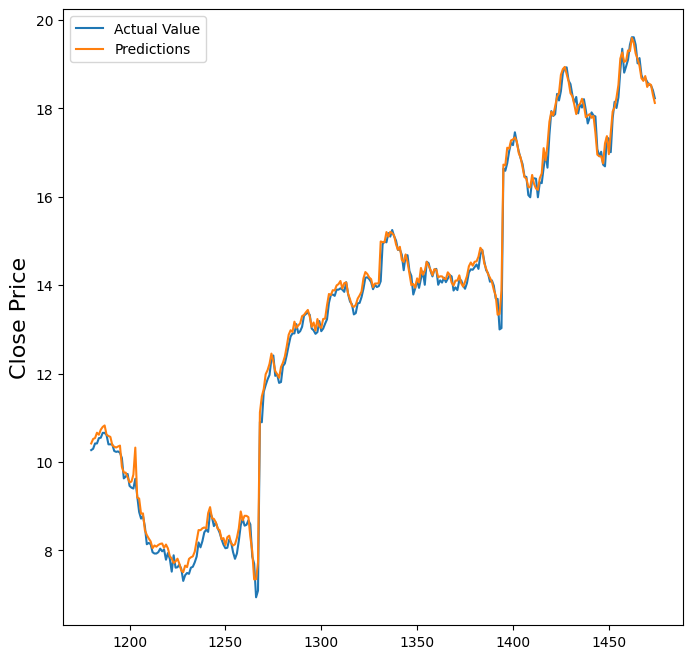

In [81]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

### 3. CNN

In [82]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [86]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [87]:
# Model Training

model_3 = reg()
model_3.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
30/30 [==============================] - 1s 8ms/step - loss: 284.4448 - val_loss: 18.9621
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 14.0225 - val_loss: 0.7402
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 0.8570 - val_loss: 0.6663
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 0.1555 - val_loss: 0.1208
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0771 - val_loss: 0.0491
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0605 - val_loss: 0.0216
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0565 - val_loss: 0.0198
Epoch 8/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0558 - val_loss: 0.0211
Epoch 9/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0563 - val_loss: 0.0198
Epoch 10/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0567 - val_loss: 0.0195
Epoch

In [88]:
# Prediction

y_pred_3 = model_3.predict(X_test)

10/10 [==============================] - 0s 1ms/step


In [89]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
1180,10.27,10.340925
1181,10.30,10.403194
1182,10.42,10.411145
1183,10.42,10.533271
1184,10.54,10.556075


In [90]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9983544291364413


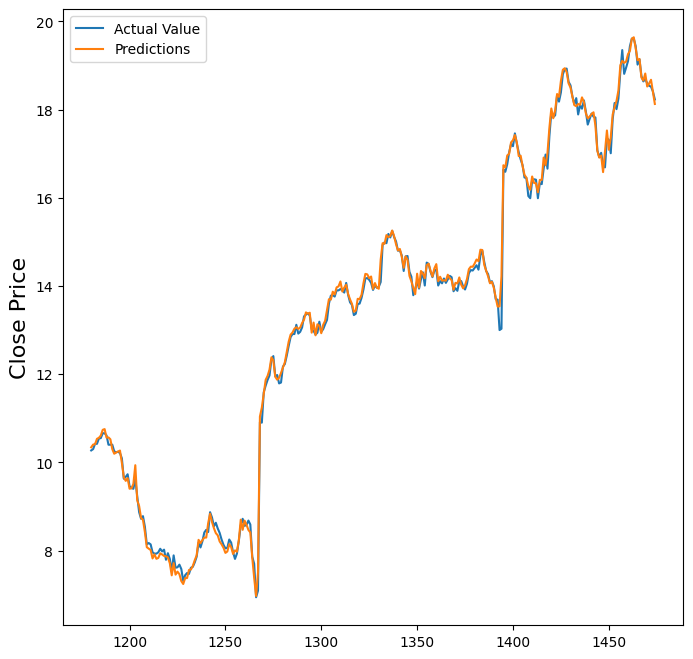

In [91]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

> Comparision of Accuracies of different models

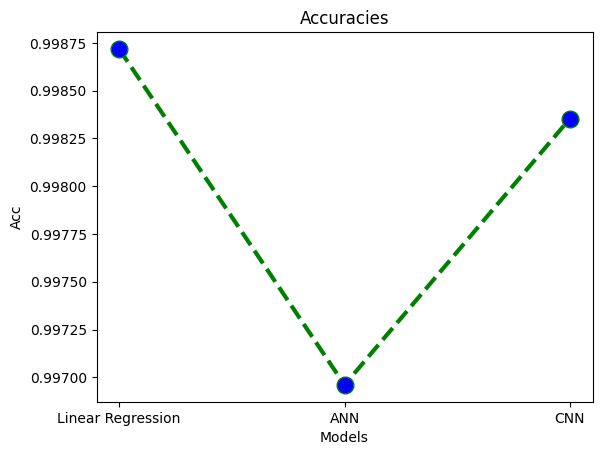

In [92]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['Linear Regression', 'ANN', 'CNN'])
plt.show()

**********************

### Now converting data in a time series data and applying some more models.

In [94]:
close = df.reset_index()['Close']
close.head()

0    25.65
1    25.83
2    25.70
3    25.95
4    26.13
Name: Close, dtype: float64

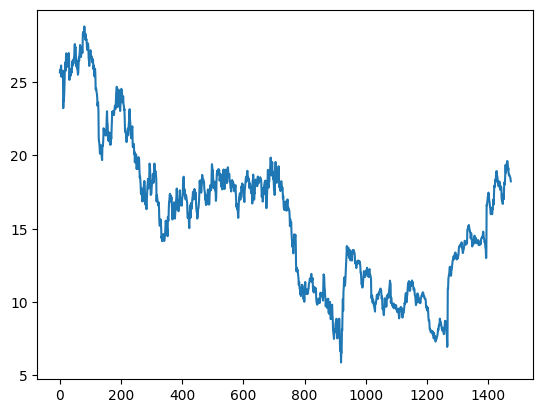

In [95]:
plt.plot(close)
plt.show()

In [96]:
time_step = 30
X, y = [], []

for i in range(len(close)-time_step-1):
    X.append(close[i:(i+time_step)])
    y.append(close[(i+time_step)])

X = np.array(X)
y = np.array(y)

In [97]:
X[:5]

array([[25.65, 25.83, 25.7 , 25.95, 26.13, 25.36, 25.78, 25.72, 25.56,
        25.72, 25.77, 23.22, 23.83, 23.72, 24.12, 24.76, 25.66, 25.94,
        26.35, 25.77, 26.78, 26.96, 26.89, 26.6 , 26.4 , 26.04, 26.61,
        26.37, 26.69, 26.98],
       [25.83, 25.7 , 25.95, 26.13, 25.36, 25.78, 25.72, 25.56, 25.72,
        25.77, 23.22, 23.83, 23.72, 24.12, 24.76, 25.66, 25.94, 26.35,
        25.77, 26.78, 26.96, 26.89, 26.6 , 26.4 , 26.04, 26.61, 26.37,
        26.69, 26.98, 26.59],
       [25.7 , 25.95, 26.13, 25.36, 25.78, 25.72, 25.56, 25.72, 25.77,
        23.22, 23.83, 23.72, 24.12, 24.76, 25.66, 25.94, 26.35, 25.77,
        26.78, 26.96, 26.89, 26.6 , 26.4 , 26.04, 26.61, 26.37, 26.69,
        26.98, 26.59, 25.15],
       [25.95, 26.13, 25.36, 25.78, 25.72, 25.56, 25.72, 25.77, 23.22,
        23.83, 23.72, 24.12, 24.76, 25.66, 25.94, 26.35, 25.77, 26.78,
        26.96, 26.89, 26.6 , 26.4 , 26.04, 26.61, 26.37, 26.69, 26.98,
        26.59, 25.15, 25.23],
       [26.13, 25.36, 25.78,

In [98]:
y[:5]

array([26.59, 25.15, 25.23, 25.81, 25.88])

In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.862942,0.870799,0.865124,0.876037,0.883893,0.850284,0.868616,0.865997,0.859014,0.865997,...,0.912265,0.920122,0.917067,0.904409,0.895679,0.879965,0.904845,0.894369,0.908337,0.920995
1,0.870799,0.865124,0.876037,0.883893,0.850284,0.868616,0.865997,0.859014,0.865997,0.868180,...,0.920122,0.917067,0.904409,0.895679,0.879965,0.904845,0.894369,0.908337,0.920995,0.903972
2,0.865124,0.876037,0.883893,0.850284,0.868616,0.865997,0.859014,0.865997,0.868180,0.756875,...,0.917067,0.904409,0.895679,0.879965,0.904845,0.894369,0.908337,0.920995,0.903972,0.841117
3,0.876037,0.883893,0.850284,0.868616,0.865997,0.859014,0.865997,0.868180,0.756875,0.783501,...,0.904409,0.895679,0.879965,0.904845,0.894369,0.908337,0.920995,0.903972,0.841117,0.844609
4,0.883893,0.850284,0.868616,0.865997,0.859014,0.865997,0.868180,0.756875,0.783501,0.778699,...,0.895679,0.879965,0.904845,0.894369,0.908337,0.920995,0.903972,0.841117,0.844609,0.869926


## Prediction

In [100]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

### 1. LSTM

In [101]:
X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [102]:
from tensorflow.python.keras.layers import LSTM

def Reg():
    model = Sequential()
    
    model.add(LSTM(70, return_sequences=True, input_shape=(30,1)))
    model.add(LSTM(70, return_sequences=True))
    model.add(LSTM(70))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [103]:
# Model Training

model_1 = reg()
model_1.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
29/29 [==============================] - 2s 16ms/step - loss: 148.5550 - val_loss: 6.3534
Epoch 2/100
29/29 [==============================] - 0s 9ms/step - loss: 6.8528 - val_loss: 0.4609
Epoch 3/100
29/29 [==============================] - 0s 9ms/step - loss: 1.9738 - val_loss: 0.4742
Epoch 4/100
29/29 [==============================] - 0s 8ms/step - loss: 1.5642 - val_loss: 0.4748
Epoch 5/100
29/29 [==============================] - 0s 8ms/step - loss: 1.5358 - val_loss: 0.4583
Epoch 6/100
29/29 [==============================] - 0s 9ms/step - loss: 1.4949 - val_loss: 0.4680
Epoch 7/100
29/29 [==============================] - 0s 9ms/step - loss: 1.4392 - val_loss: 0.4786
Epoch 8/100
29/29 [==============================] - 0s 8ms/step - loss: 1.4000 - val_loss: 0.4843
Epoch 9/100
29/29 [==============================] - 0s 8ms/step - loss: 1.3877 - val_loss: 0.5632
Epoch 10/100
29/29 [==============================] - 0s 8ms/step - loss: 1.3204 - val_loss: 0.4376
Epoch 

In [104]:
# Prediction

y_pred_1 = model_1.predict(X_test_)

10/10 [==============================] - 0s 3ms/step


In [105]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,10.55,10.350846
1,10.66,10.362782
2,10.66,10.462911
3,10.61,10.478171
4,10.40,10.437827


In [106]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9825180469971643


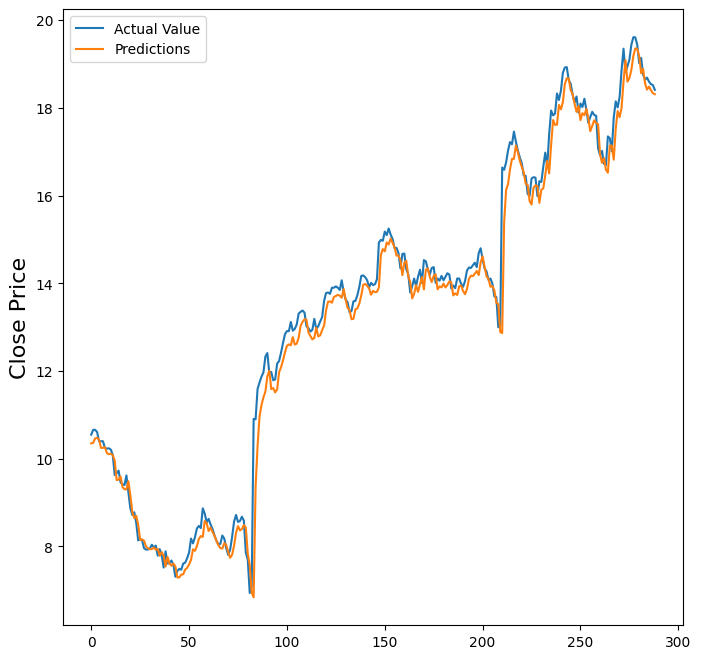

In [107]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

### 2. ANN

In [109]:
# Model Training

model_2 = regressor(inp_dim=30)
model_2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
29/29 [==============================] - 1s 7ms/step - loss: 331.0835 - val_loss: 115.4720
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 318.3601 - val_loss: 106.5679
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 250.0462 - val_loss: 70.7265
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 80.7383 - val_loss: 11.6886
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 5.2680 - val_loss: 6.6195
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 4.0686 - val_loss: 6.7533
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 3.9614 - val_loss: 6.6032
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 3.8813 - val_loss: 6.3944
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 3.8118 - val_loss: 6.2458
Epoch 10/100
29/29 [==============================] - 0s 2ms/step - loss: 3.7240 - val_loss: 5.7

In [110]:
# Prediction

y_pred_2 = model_2.predict(X_test)

10/10 [==============================] - 0s 1ms/step


In [128]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})

In [111]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9665699700116918


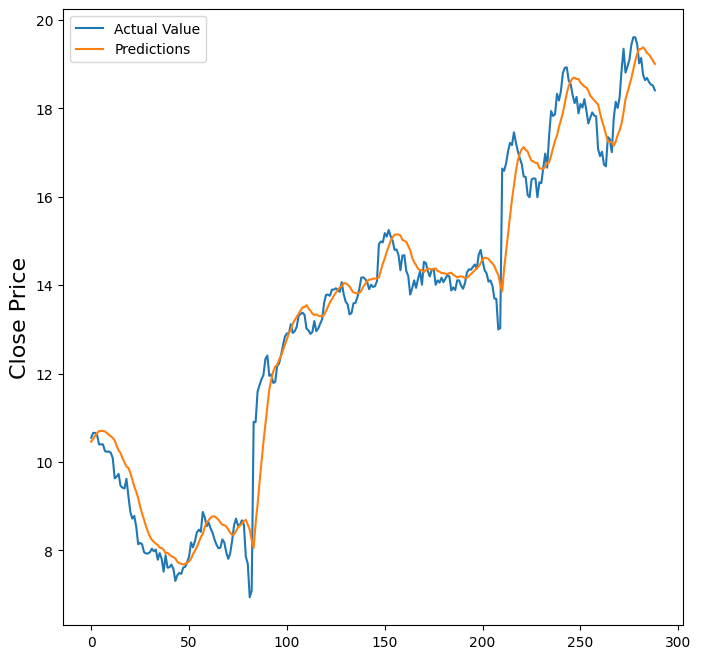

In [129]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

### 3. CNN

In [130]:
# Model Training

model_3 = reg()
model_3.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
29/29 [==============================] - 2s 14ms/step - loss: 143.1663 - val_loss: 16.0313
Epoch 2/100
29/29 [==============================] - 0s 9ms/step - loss: 6.6690 - val_loss: 0.7805
Epoch 3/100
29/29 [==============================] - 0s 8ms/step - loss: 1.7981 - val_loss: 0.4807
Epoch 4/100
29/29 [==============================] - 0s 8ms/step - loss: 1.5245 - val_loss: 0.6895
Epoch 5/100
29/29 [==============================] - 0s 7ms/step - loss: 1.4798 - val_loss: 0.4252
Epoch 6/100
29/29 [==============================] - 0s 8ms/step - loss: 1.3835 - val_loss: 0.5122
Epoch 7/100
29/29 [==============================] - 0s 8ms/step - loss: 1.3458 - val_loss: 0.4259
Epoch 8/100
29/29 [==============================] - 0s 8ms/step - loss: 1.2872 - val_loss: 0.4739
Epoch 9/100
29/29 [==============================] - 0s 7ms/step - loss: 1.2212 - val_loss: 0.3955
Epoch 10/100
29/29 [==============================] - 0s 9ms/step - loss: 1.1658 - val_loss: 0.4724
Epoch

In [114]:
# Prediction

y_pred_3 = model_3.predict(X_test_)

10/10 [==============================] - 0s 3ms/step


In [124]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,10.55,10.341760
1,10.66,10.320880
2,10.66,10.396698
3,10.61,10.432269
4,10.40,10.411634


In [116]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9825060600808279


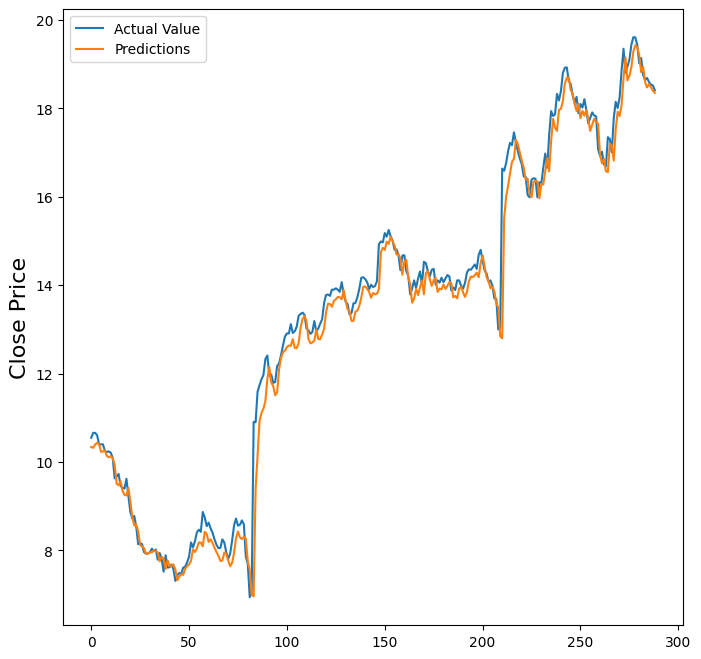

In [125]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

> Comparision of Accuracies of different models

In [ ]:

plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['LSTM', 'ANN', 'CNN'])
plt.show()